# Clustering알고리즘 이용해서 X Y feature간의 관계 찾기
---
##  Result : 
  - XY feature만으로는 Clustering 알고리즘이 적용불가
  - 분포가 겹쳐있다

In [47]:
import numpy as np
import pandas as pd

# Data load

In [48]:
train = pd.read_csv("./train.csv/train.csv")
train.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


# lat, lng -> pixel 로 변환

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad+np.pi/2.0)/2.0))
    x = 100*(lng + 180.0)/360.0
    y = 100*(lat_rad -np.pi)/(2.0*np.pi)
    return (x,y)

In [50]:
px, py = lat_lng_to_pixels(train["Y"],train["X"])
print(px.min())
print(px.max())
print(py.min())
print(py.max())

15.9684327599
16.5277777778
-38.6756361285
544.154944795


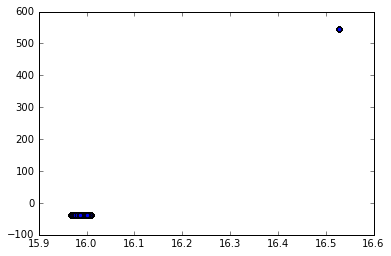

In [51]:
plt.scatter(px,py)

# X Y 좌표 확대 및 분포확인 

(-38.68, -38.63)

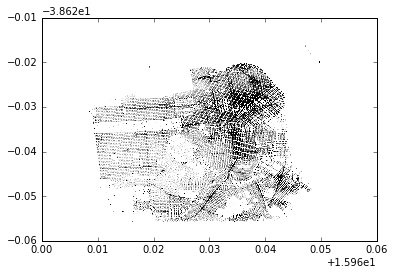

In [52]:
plt.scatter(px,py,s=.05,alpha=.03)
plt.xlim(15.96,16.02)
plt.ylim(-38.68,-38.63)

In [53]:
train_plot = train['Category']
train_plot = pd.concat((train_plot,px),axis=1)
train_plot = pd.concat((train_plot,py),axis=1)
train_plot.head(3)

,Category,X,Y
0,WARRANTS,15.992808,-38.652200
1,OTHER OFFENSES,15.992808,-38.652200
2,OTHER OFFENSES,15.993232,-38.643126


# Category별 분포

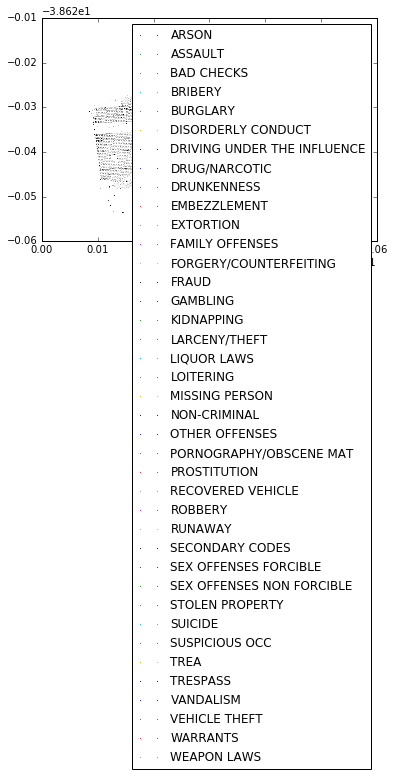

In [54]:
groups = train.groupby('Category')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X, group.Y, 
             marker='.', markersize =1,
            linestyle='',label=name)
ax.legend()

plt.scatter(px,py,s=.05,alpha=.03)
plt.xlim(15.96,16.02)
plt.ylim(-38.68,-38.63)
plt.show()

# WARRANTS 분포

In [55]:
train_plot = train['Category']
train_plot = pd.concat((train_plot,px),axis=1)
train_plot = pd.concat((train_plot,py),axis=1)

train_WARRANTS = train_plot
train_WARRANTS.head(10)

,Category,X,Y
0,WARRANTS,15.992808,-38.652200
1,OTHER OFFENSES,15.992808,-38.652200
2,OTHER OFFENSES,15.993232,-38.643126
3,LARCENY/THEFT,15.992501,-38.642965
4,LARCENY/THEFT,15.989240,-38.653274
5,LARCENY/THEFT,15.999097,-38.673687
6,VEHICLE THEFT,15.993520,-38.669576
7,VEHICLE THEFT,16.007979,-38.668724
8,LARCENY/THEFT,15.969946,-38.651496
9,LARCENY/THEFT,15.994698,-38.640529


In [56]:
train_WARRANTS.loc[train_WARRANTS['Category']!='WARRANTS','Category']=0
train_WARRANTS.loc[train_WARRANTS['Category']=='WARRANTS','Category']=1
train_WARRANTS.head(10)

,Category,X,Y
0,1,15.992808,-38.652200
1,0,15.992808,-38.652200
2,0,15.993232,-38.643126
3,0,15.992501,-38.642965
4,0,15.989240,-38.653274
5,0,15.999097,-38.673687
6,0,15.993520,-38.669576
7,0,16.007979,-38.668724
8,0,15.969946,-38.651496
9,0,15.994698,-38.640529


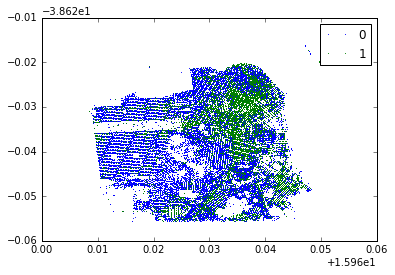

In [57]:
groups = train_WARRANTS.groupby('Category')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X, group.Y, 
             marker='.', markersize =1,
            linestyle='', label=name)
ax.legend()

plt.scatter(px,py,s=.05,alpha=.03)
plt.xlim(15.96,16.02)
plt.ylim(-38.68,-38.63)
plt.show()

# VEHICLE THEFT 분포

In [58]:
train_VEHICLE_THEFT = train['Category']
train_VEHICLE_THEFT = pd.concat((train_VEHICLE_THEFT,px),axis=1)
train_VEHICLE_THEFT = pd.concat((train_VEHICLE_THEFT,py),axis=1)

train_VEHICLE_THEFT.head(10)

,Category,X,Y
0,WARRANTS,15.992808,-38.652200
1,OTHER OFFENSES,15.992808,-38.652200
2,OTHER OFFENSES,15.993232,-38.643126
3,LARCENY/THEFT,15.992501,-38.642965
4,LARCENY/THEFT,15.989240,-38.653274
5,LARCENY/THEFT,15.999097,-38.673687
6,VEHICLE THEFT,15.993520,-38.669576
7,VEHICLE THEFT,16.007979,-38.668724
8,LARCENY/THEFT,15.969946,-38.651496
9,LARCENY/THEFT,15.994698,-38.640529


In [59]:
train_VEHICLE_THEFT.loc[train_VEHICLE_THEFT['Category']!='VEHICLE THEFT','Category']=0
train_VEHICLE_THEFT.loc[train_VEHICLE_THEFT['Category']=='VEHICLE THEFT','Category']=1
train_VEHICLE_THEFT.head(10)

,Category,X,Y
0,0,15.992808,-38.652200
1,0,15.992808,-38.652200
2,0,15.993232,-38.643126
3,0,15.992501,-38.642965
4,0,15.989240,-38.653274
5,0,15.999097,-38.673687
6,1,15.993520,-38.669576
7,1,16.007979,-38.668724
8,0,15.969946,-38.651496
9,0,15.994698,-38.640529


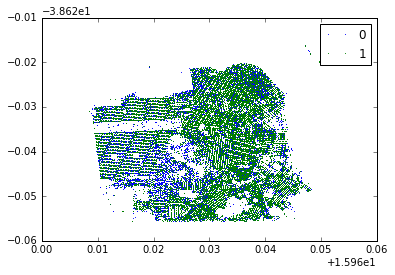

In [60]:
groups = train_VEHICLE_THEFT.groupby('Category')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X, group.Y, 
             marker='.', markersize =1,
            linestyle='', label=name)
ax.legend()

plt.scatter(px,py,s=.05,alpha=.03)
plt.xlim(15.96,16.02)
plt.ylim(-38.68,-38.63)
plt.show()